<a href="https://colab.research.google.com/github/SAIKUMAR918/Machine-learning-Mini-projects/blob/main/AssociationRuleMining_on_store_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Association Rule Mining </center>

__Association Rules__ is an unsupervised technique to extract pattern or relation between items. The rule defines association between A and B as A => B i.e if A is purchased B is also purchased. 

An association rule consists of an antecedent and a consequent.

$${\{Pen, Pencil\}} \to \{Paper\}$$
$$     {antecedent} \to consequent$$

For a given rule, `itemset` is the list of all the items in the antecedent and the consequent.

$${itemset} \to \{Pen, Pencil, Paper\}$$

### Measuring the strength of a rule

**Support**

Support is the fraction of the total number of transactions in which the itemset occurs.

$$
{Support(\{A\} \to \{B\}) = \frac{Transactions\ containing\ both\ A\ and\ B"}{Total\ number\ of\ transactions}}
$$

**Confidence**

Confidence is the conditional probability of occurrence of consequent given the antecedent.

$$
{Confidence(\{A\} \to \{B\}) = \frac{Transactions\ containing\ both\ A\ and\ B"}{Transactions\ containing\ A}}
$$

**Lift**

Lift is a very literal term given to this measure. Think of it as the **`lift`** that {A} provides to our confidence for having {B} on the cart. To rephrase, lift is the rise in probability of having {B} on the cart with the knowledge of {A} being present over the probability of having {B} on the cart without any knowledge about presence of {A}. Mathematically,

$$
{Lift(\{A\} \to \{B\}) = ( \frac{Transactions\ containing\ both\ A\ and\ B}{Transactions\ containing\ A}} )/{(Fractions\ of\ transactions\ containing\ B )}
$$

#### Frequent itemsets

An itemset is considered as `frequent` if it meets a user-specified __support threshold__. 

For instance, if a threshold of support is 0.05 (5%), a frequent itemset is defined as a set of items that occur together in at least 5% of all transactions in the database.

## Case study -1 (Transaction Data)

In [1]:
pip install mlxtend #mlxtend : Machine learning extensions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
## import libraries
import pandas as pd
#mlxtend : Machine learning extensions
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


import random
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
#Read the data 
trans=pd.read_csv("/content/drive/MyDrive/Association Rules/Transactions.csv",header=None)
trans.head()

,0,1
0,1001,Choclates
1,1001,Pencil
2,1001,Marker
3,1002,Pencil
4,1002,Choclates


In [7]:
## Assign column names
trans.columns = ['Id','Items']
trans.head()

,Id,Items
0,1001,Choclates
1,1001,Pencil
2,1001,Marker
3,1002,Pencil
4,1002,Choclates


In [8]:
# basket1= pd.crosstab(trans.Id, trans.Items).astype('bool').astype('int')
basket = pd.crosstab(trans.Id, trans.Items)
basket

Items,Choclates,Coke,Cookies,Eraser,Marker,Pencil
Id,,,,,,
1001,1,0,0,0,1,1
1002,1,0,0,0,0,1
1003,0,1,0,1,0,1
1004,1,0,1,0,0,1
1005,0,0,0,0,1,0
1006,0,0,0,0,1,1
1007,1,0,0,0,0,1
1008,1,0,1,0,0,1
1009,0,0,0,0,1,1


In [9]:
basket.columns.name = None
basket.index.name = None
basket

,Choclates,Coke,Cookies,Eraser,Marker,Pencil
1001,1,0,0,0,1,1
1002,1,0,0,0,0,1
1003,0,1,0,1,0,1
1004,1,0,1,0,0,1
1005,0,0,0,0,1,0
1006,0,0,0,0,1,1
1007,1,0,0,0,0,1
1008,1,0,1,0,0,1
1009,0,0,0,0,1,1
1010,0,1,0,0,1,0


In [10]:
frequent_itemsets = apriori(basket, min_support=0.07, use_colnames=True)
print(frequent_itemsets )

    support                      itemsets
0       0.5                   (Choclates)
1       0.2                        (Coke)
2       0.2                     (Cookies)
3       0.1                      (Eraser)
4       0.5                      (Marker)
5       0.8                      (Pencil)
6       0.2          (Cookies, Choclates)
7       0.1           (Marker, Choclates)
8       0.5           (Pencil, Choclates)
9       0.1                (Eraser, Coke)
10      0.1                (Marker, Coke)
11      0.1                (Pencil, Coke)
12      0.2             (Pencil, Cookies)
13      0.1              (Pencil, Eraser)
14      0.3              (Pencil, Marker)
15      0.2  (Pencil, Cookies, Choclates)
16      0.1   (Pencil, Marker, Choclates)
17      0.1        (Eraser, Pencil, Coke)


In [11]:
## Extract the rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules = rules.loc[:,["antecedents","consequents","support","confidence","lift"]]

rules

,antecedents,consequents,support,confidence,lift
0,(Cookies),(Choclates),0.2,1.000,2.00
1,(Choclates),(Cookies),0.2,0.400,2.00
2,(Pencil),(Choclates),0.5,0.625,1.25
3,(Choclates),(Pencil),0.5,1.000,1.25
4,(Eraser),(Coke),0.1,1.000,5.00
5,(Coke),(Eraser),0.1,0.500,5.00
6,(Marker),(Coke),0.1,0.200,1.00
7,(Coke),(Marker),0.1,0.500,1.00
8,(Pencil),(Cookies),0.2,0.250,1.25
9,(Cookies),(Pencil),0.2,1.000,1.25


In [12]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [13]:
@interact
def thresholds(lift=(0,1.5,0.1),confidence=(0,1,0.1),support=(0,1,0.05)):
    print(rules[ (rules['lift'] >= lift) &
       (rules['confidence'] >= confidence) &
     (rules['support'] < support)])
    

interactive(children=(FloatSlider(value=0.7000000000000001, description='lift', max=1.5), FloatSlider(value=0.…

In [14]:
## Set thresholds on lift,confidance,support and check 

rules[ (rules['lift'] >= 1.5) &
       (rules['confidence'] >= 0.8) &
     (rules['support'] < 0.2)]

,antecedents,consequents,support,confidence,lift
4,(Eraser),(Coke),0.1,1.0,5.0
20,"(Pencil, Eraser)",(Coke),0.1,1.0,5.0
22,"(Pencil, Coke)",(Eraser),0.1,1.0,10.0
23,(Eraser),"(Pencil, Coke)",0.1,1.0,10.0


## Visualizing the rules 

In [15]:
@interact
def plot_columns(data_points=(0,len(rules)),x_axis='support',y_axis='confidence',alpha=[0.5,1]):
    x,y = rules.loc[:data_points,x_axis],rules.loc[:data_points,y_axis]
    plt.scatter(x,y,lw=1,alpha=alpha)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.show()

interactive(children=(IntSlider(value=13, description='data_points', max=26), Text(value='support', descriptio…

In [16]:
## Store the column as a numpy array
support = rules['support'].values
confidence = rules['confidence'].values

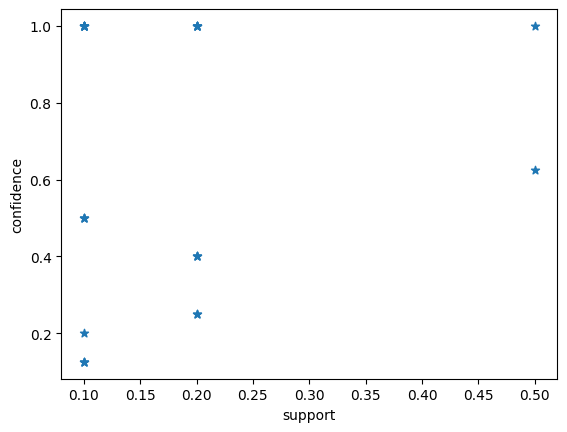

In [17]:
## Without jitter
plt.scatter(rules.support, rules.confidence,alpha=1, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [18]:
len(support)

26

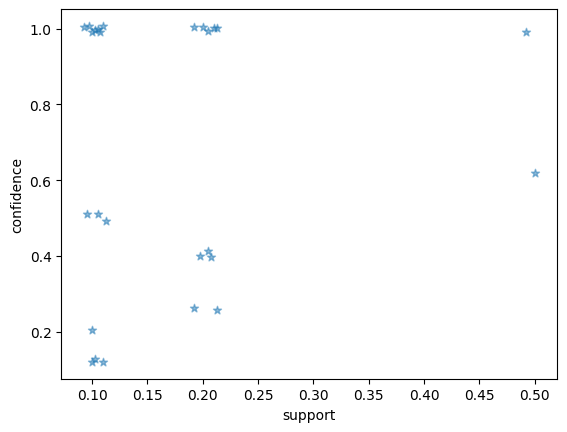

In [19]:
## With jitter
for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
plt.scatter(support, confidence,alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()